# Initial Analysis - Loading and Inspecting Dataset

In [1]:
# Load dataset
import pandas as pd

df = pd.read_csv("CW1_train.csv")

# Display dataset shape & column types
print("Dataset Shape:", df.shape)
print("\nColumn Data Types:\n", df.dtypes)

Dataset Shape: (10000, 31)

Column Data Types:
 outcome    float64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
a1         float64
a2         float64
a3         float64
a4         float64
a5         float64
b1         float64
b2         float64
b3         float64
b4         float64
b5         float64
a6         float64
a7         float64
a8         float64
a9         float64
a10        float64
b6         float64
b7         float64
b8         float64
b9         float64
b10        float64
dtype: object


In [2]:
# Check for missing values
print("\nMissing Values per Column:\n", df.isnull().sum())


Missing Values per Column:
 outcome    0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
a1         0
a2         0
a3         0
a4         0
a5         0
b1         0
b2         0
b3         0
b4         0
b5         0
a6         0
a7         0
a8         0
a9         0
a10        0
b6         0
b7         0
b8         0
b9         0
b10        0
dtype: int64


In [3]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


# Visualising Data Distributions

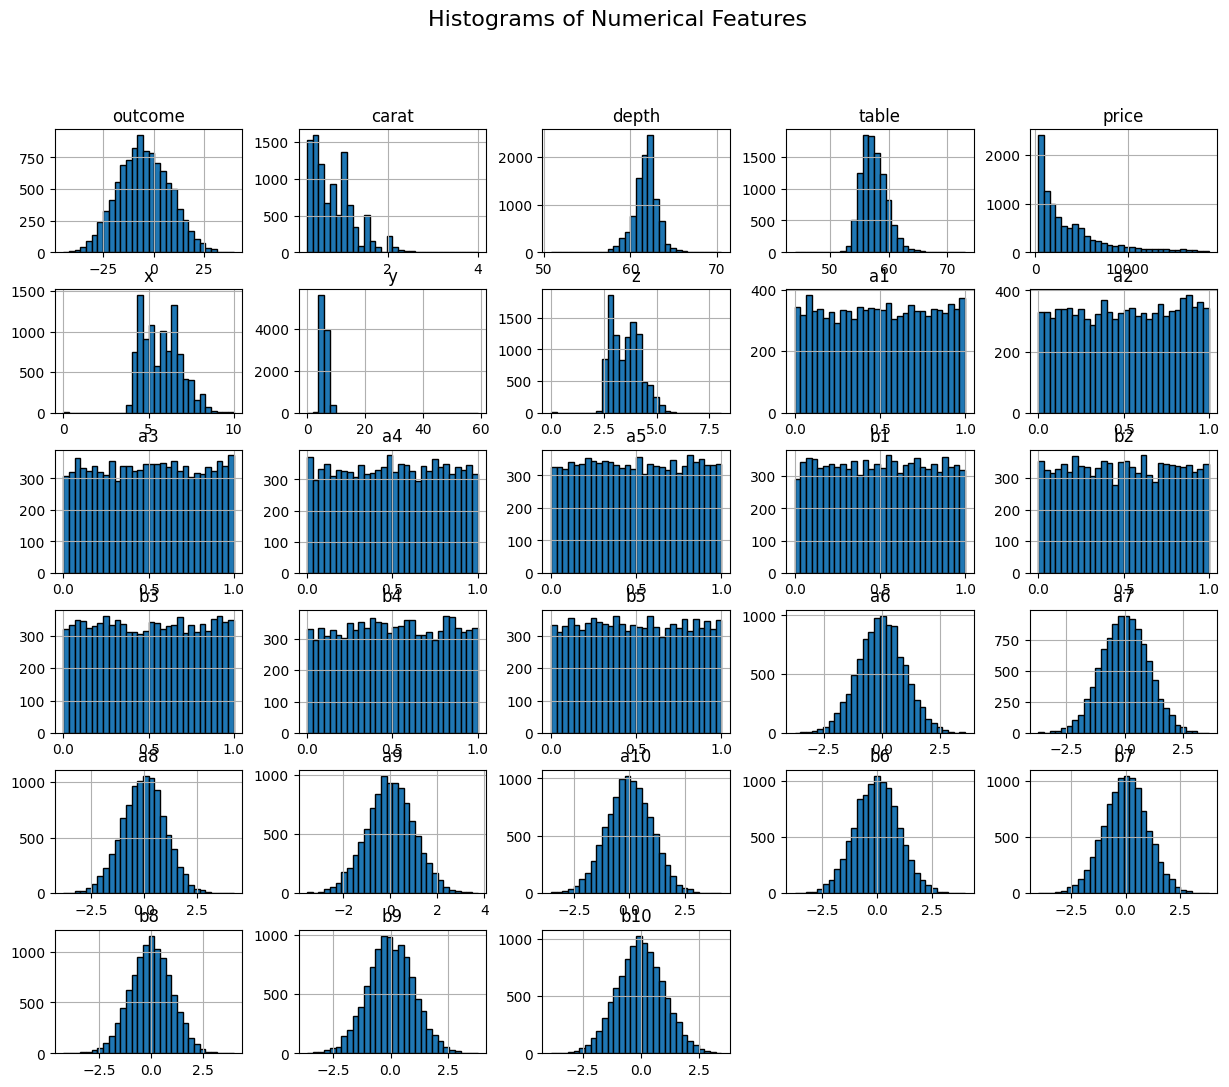

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns (exclude categorical features)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical features
df[numerical_columns].hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.show()

Skewed Distributions & Outliers:
- `price` is highly right-skewed (long tail on the right).
- `carat` also appears right-skewed, meaning we might need to apply log transformation to normalize it.
- `depth` and `table` seem to have a somewhat normal distribution but may have some concentration around specific values.

Normal Distributions:
- `outcome` appears roughly normally distributed.
- Many features (`b1` to `b10`, `a6` to `a10`) have a standardized normal-like distribution (centered around zero with symmetric spread).

Uniform Distributions:
- Some of the `a` and `b` features (`a1` to `a5`, `b1` to `b5`) appear to be uniformly distributed, which suggests they might be random or engineered features.

/tmp/ipykernel_76613/4280640699.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="viridis")
/tmp/ipykernel_76613/4280640699.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="viridis")
/tmp/ipykernel_76613/4280640699.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], ax=axes[i], palette="viridis")


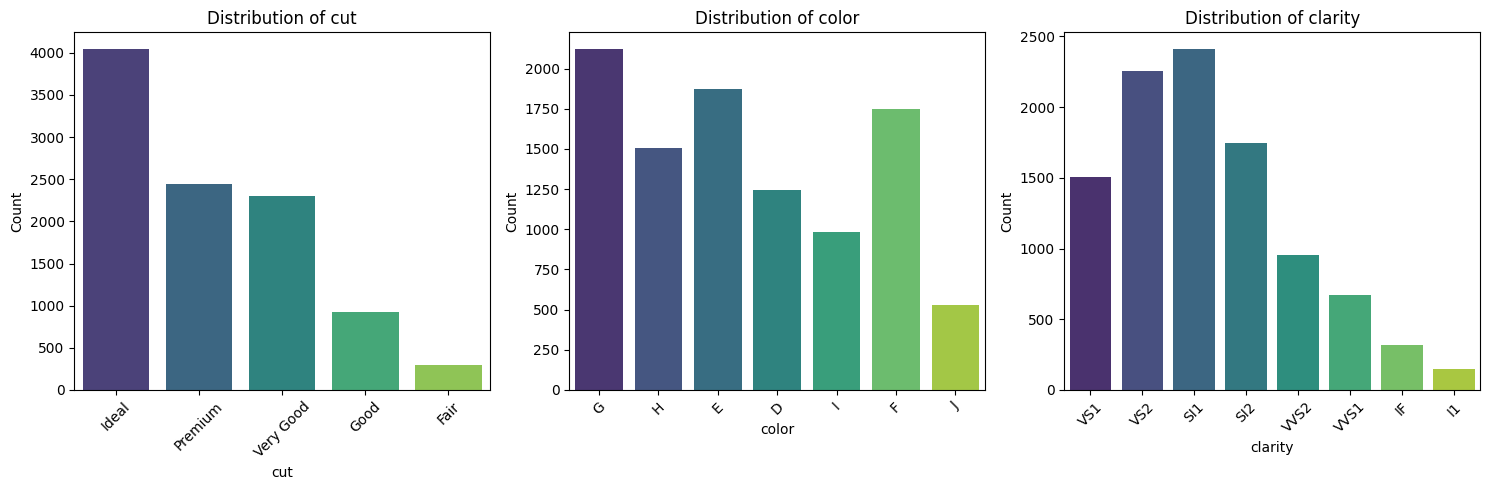

In [5]:
# Select categorical columns
categorical_columns = ['cut', 'color', 'clarity']

# Plot bar charts for categorical features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(categorical_columns):
    sns.countplot(x=df[col], ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Encoding Categorical Variables

In [6]:
from sklearn.preprocessing import OrdinalEncoder

# Define ordinal mapping
cut_order = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
color_order = ["J", "I", "H", "G", "F", "E", "D"]  # D is best, J is worst
clarity_order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

# Apply ordinal encoding
encoder = OrdinalEncoder(categories=[cut_order, color_order, clarity_order])
df[["cut", "color", "clarity"]] = encoder.fit_transform(df[["cut", "color", "clarity"]])

# Convert encoded values to integer type
df[["cut", "color", "clarity"]] = df[["cut", "color", "clarity"]].astype(int)

# Display updated dataset
df.head()

,outcome,carat,cut,color,clarity,depth,table,price,x,y,...,a6,a7,a8,a9,a10,b6,b7,b8,b9,b10
0,-26.701232,1.14,4,3,4,62.3,56.0,7948,6.73,6.70,...,0.168836,-0.273758,1.107832,1.247795,0.482344,0.489511,-0.321138,0.573382,0.446871,-1.990581
1,6.548093,0.38,3,2,3,60.5,59.0,898,4.69,4.66,...,-0.256549,0.315373,-0.030326,-0.114335,-1.059588,-1.761360,-1.343951,-1.002550,-0.225030,-0.446653
2,6.612562,0.50,2,5,2,60.7,58.0,1351,5.09,5.13,...,-1.193327,-0.657307,-0.591726,-0.446856,-0.765286,-0.816544,-1.397794,-0.477130,0.810509,1.725131
3,-5.073562,0.70,3,6,2,61.2,58.0,2512,5.74,5.70,...,-1.740788,-1.778860,-0.825070,0.444932,1.173109,0.453606,-0.263440,0.246210,-0.850503,-0.412950
4,-14.436557,0.83,4,3,1,62.4,54.0,2751,6.01,6.08,...,-0.859322,1.409268,0.861992,1.109063,-1.436722,-1.461618,0.081787,0.258087,0.851146,2.204813


# Detecting Outliers

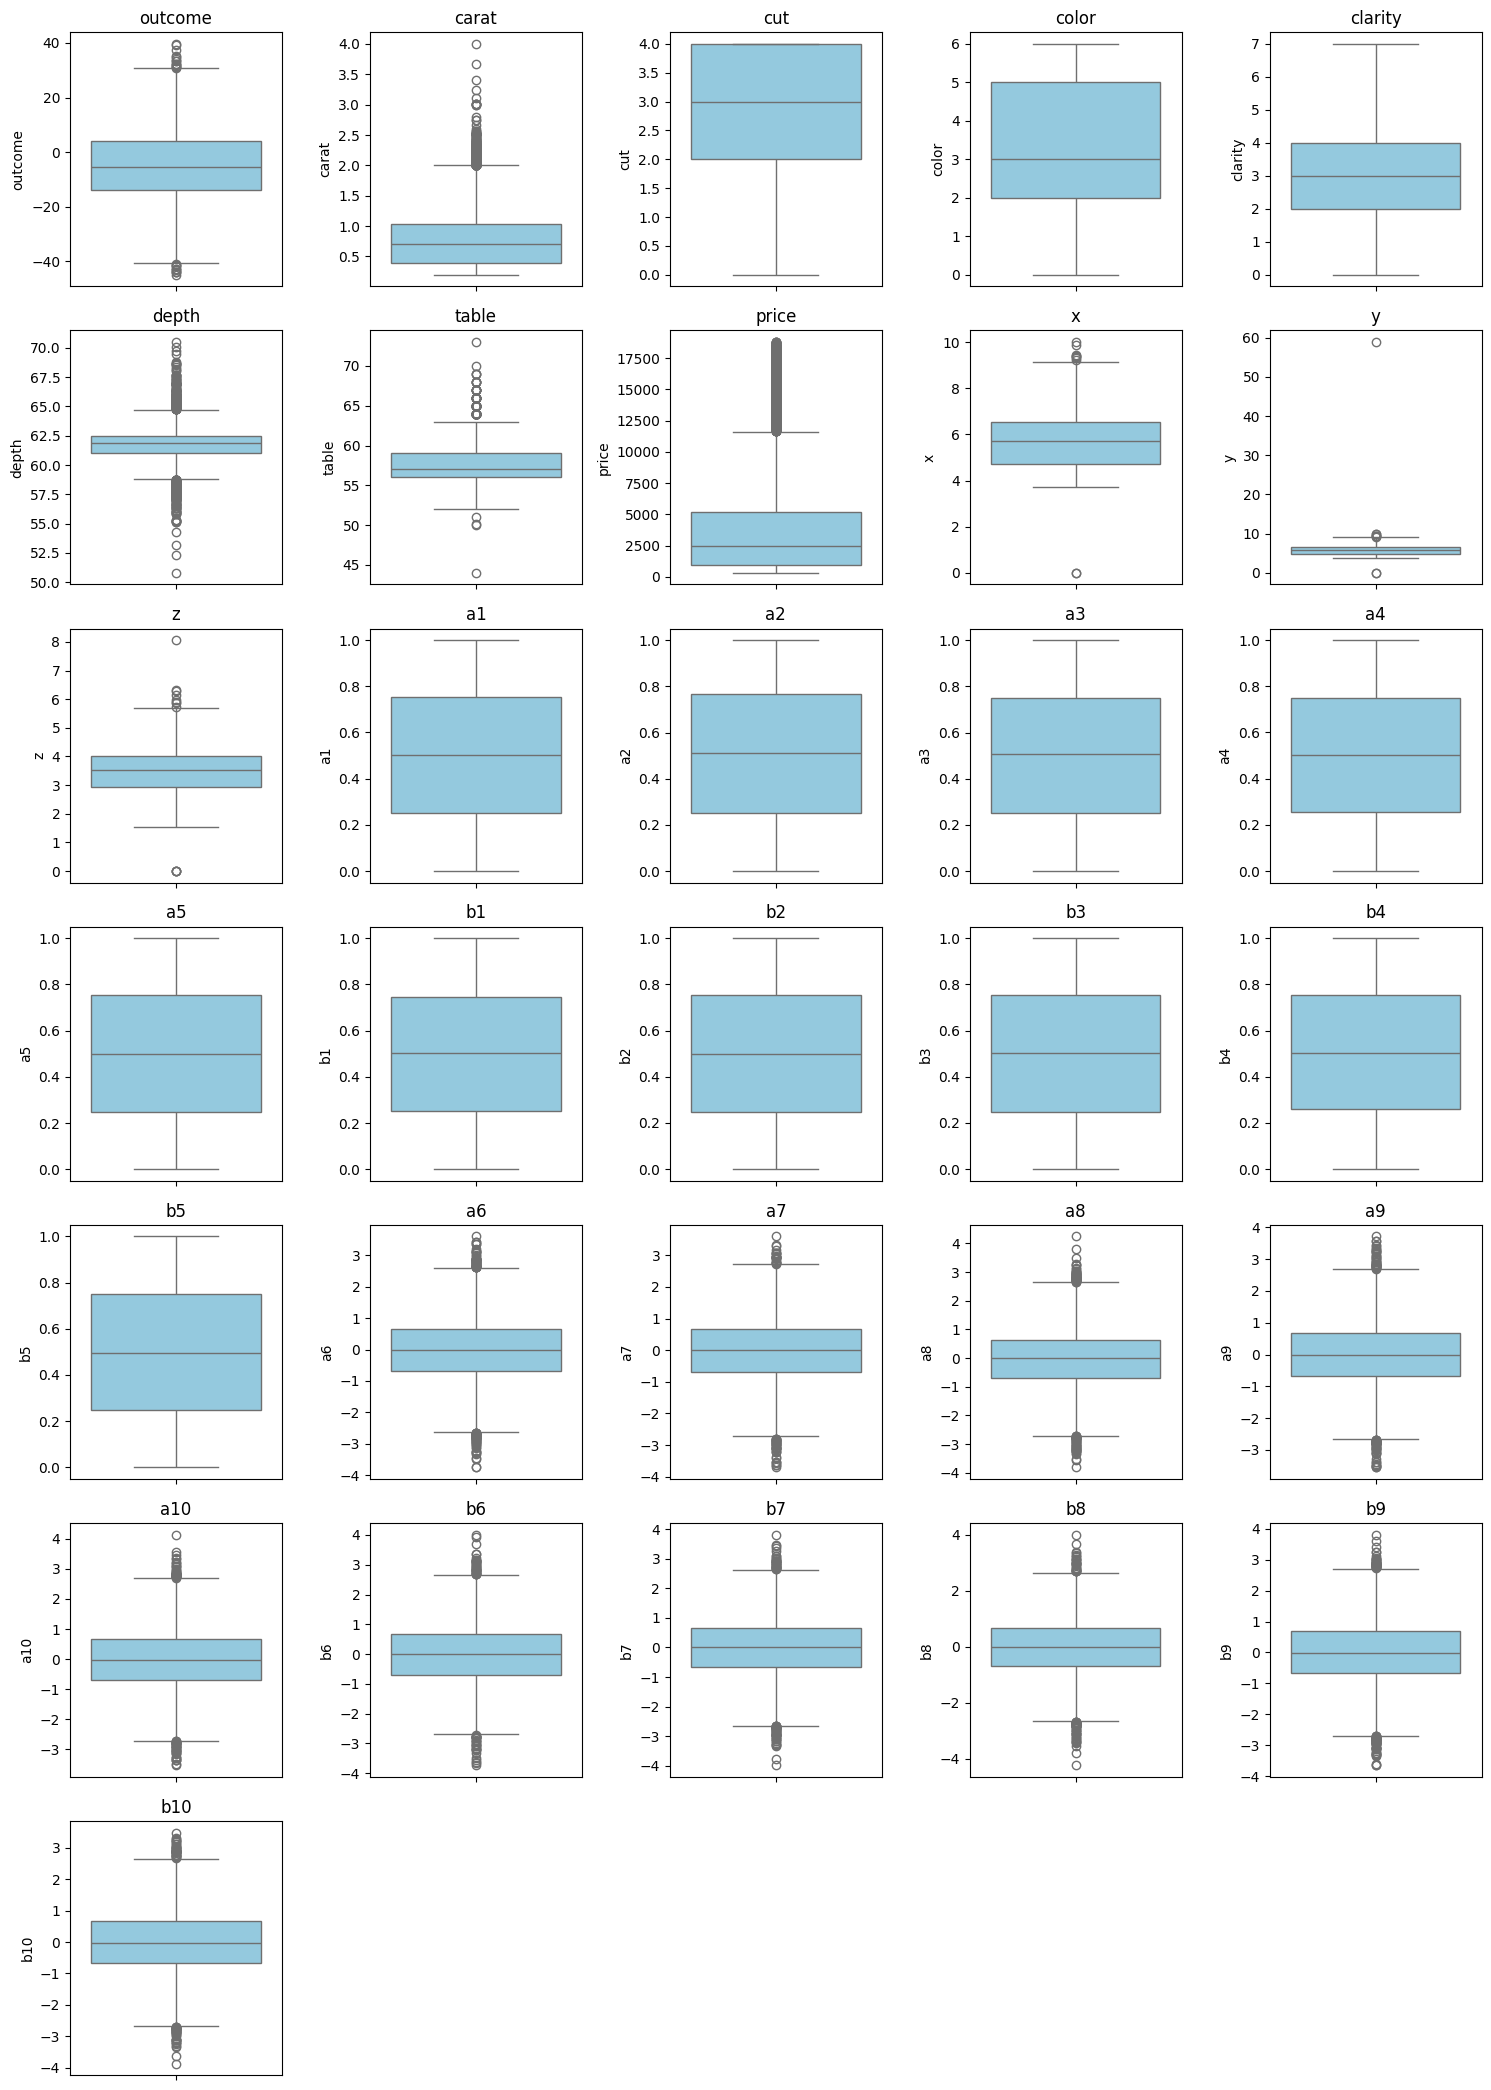

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Define number of rows and columns for subplots dynamically
num_cols = 5  # Set number of columns
num_rows = int(np.ceil(len(numerical_columns) / num_cols))  # Compute required rows

# Create boxplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 3))

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)

# Remove empty subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

We will not remove outliers for now because feature meanings are unclear and no extreme skews justify immediate removal.

In [8]:
import numpy as np

# Compute skewness for numerical features
skew_values = df.select_dtypes(include=['float64', 'int64']).apply(lambda x: x.skew()).sort_values(ascending=False)

# Display skewness values
print("\nSkewness of Numerical Features:\n", skew_values)


Skewness of Numerical Features:
 y          8.372088
price      1.633379
carat      1.153380
table      0.721103
clarity    0.545046
x          0.373087
z          0.364712
outcome    0.083080
b10        0.019527
b5         0.012293
b6         0.007632
a5         0.007531
b3         0.003986
b2         0.000515
a6        -0.000117
b1        -0.000258
a3        -0.003662
b4        -0.007648
b9        -0.009831
a1        -0.010857
a10       -0.015344
a4        -0.019157
a9        -0.020444
a2        -0.027996
a7        -0.033658
b8        -0.034361
a8        -0.034436
b7        -0.058334
color     -0.206708
depth     -0.230483
cut       -0.699483
dtype: float64


# Feature Selection

### Filter Methods

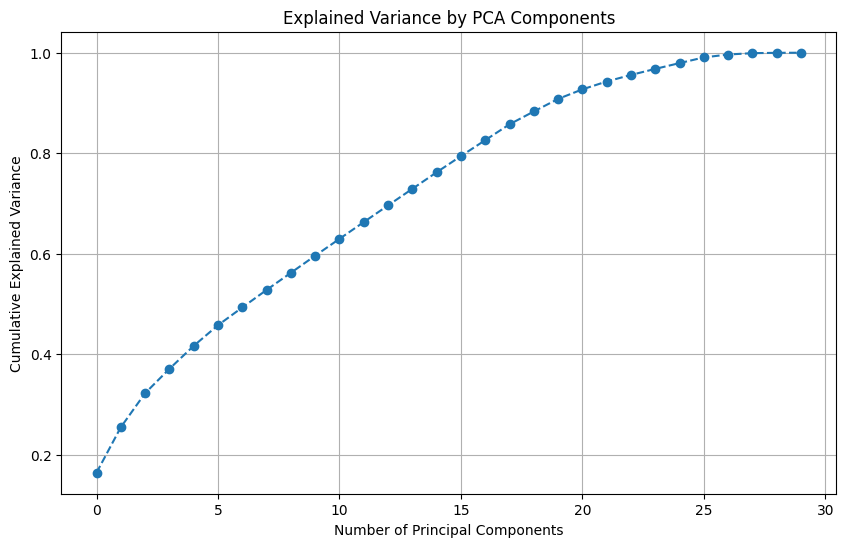

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Standardize numerical features before PCA
numerical_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['outcome'])  # Exclude target
scaler = StandardScaler()
df_scaled = scaler.fit_transform(numerical_features)

# Apply PCA
pca = PCA()
pca.fit(df_scaled)

# Explained variance plot
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

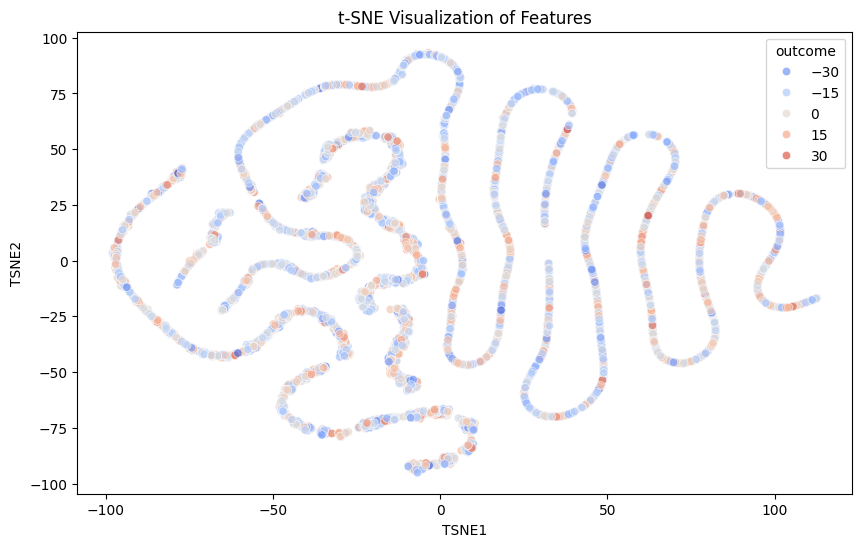

In [14]:
from sklearn.manifold import TSNE
import seaborn as sns

# Reduce features to 2D space using t-SNE
X_reduced = TSNE(n_components=2, random_state=42).fit_transform(X)

# Convert to DataFrame
df_tsne = pd.DataFrame(X_reduced, columns=['TSNE1', 'TSNE2'])
df_tsne['outcome'] = y  # Add target variable for color coding

# Plot t-SNE results
plt.figure(figsize=(10,6))
sns.scatterplot(x=df_tsne['TSNE1'], y=df_tsne['TSNE2'], hue=df_tsne['outcome'], palette="coolwarm", alpha=0.7)
plt.title("t-SNE Visualization of Features")
plt.show()

- Lack of well-defined clusters: The dataset likely doesn’t have strong natural groupings, meaning that class separation isn’t straightforward.
- Non-linear relationships: Linear dimensionality reduction (like PCA) might not be the best approach, and we might need non-linear models.

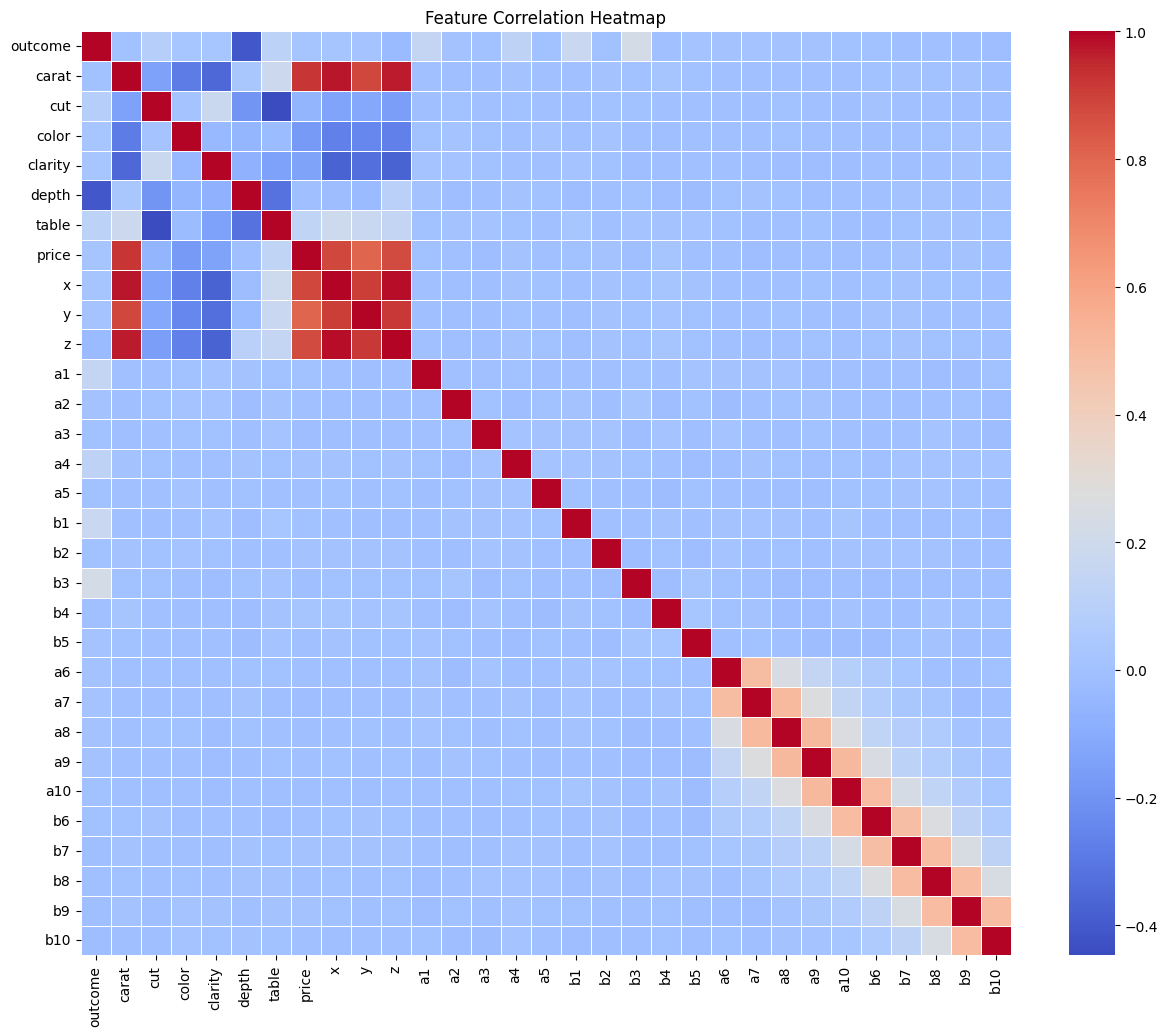


Feature Correlation with 'outcome':
 outcome    1.000000
b3         0.225407
b1         0.173719
a1         0.149101
a4         0.122441
table      0.114977
cut        0.087478
color      0.027024
clarity    0.025333
x          0.020354
price      0.016967
y          0.015924
a7         0.012512
b5         0.012370
a2         0.008760
a8         0.007983
a6         0.007238
a9         0.005361
a3         0.003126
carat      0.002538
a10        0.002492
b2         0.001640
a5         0.000690
b6         0.000079
b8        -0.002645
b4        -0.003845
b9        -0.007324
b7        -0.009241
b10       -0.012036
z         -0.031470
depth     -0.411073
Name: outcome, dtype: float64


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute Pearson correlation matrix
correlation_matrix = df.corr()

# Visualize correlation with a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Show correlations of all features with 'outcome'
correlation_with_target = correlation_matrix["outcome"].sort_values(ascending=False)
print("\nFeature Correlation with 'outcome':\n", correlation_with_target)

Correlations are quite low overall, so some feature transformation or synthesis may be necessary.


Mutual Information Scores:
 depth      0.200461
b3         0.030962
a1         0.023410
y          0.020760
b8         0.019346
a4         0.015043
z          0.012093
color      0.009703
b4         0.008634
b1         0.007634
table      0.007200
a3         0.007155
x          0.006999
a2         0.006211
b2         0.006056
clarity    0.004767
a10        0.004593
a8         0.004011
price      0.003290
b10        0.002468
b7         0.000839
a6         0.000000
a7         0.000000
b5         0.000000
a9         0.000000
cut        0.000000
b6         0.000000
a5         0.000000
b9         0.000000
carat      0.000000
dtype: float64


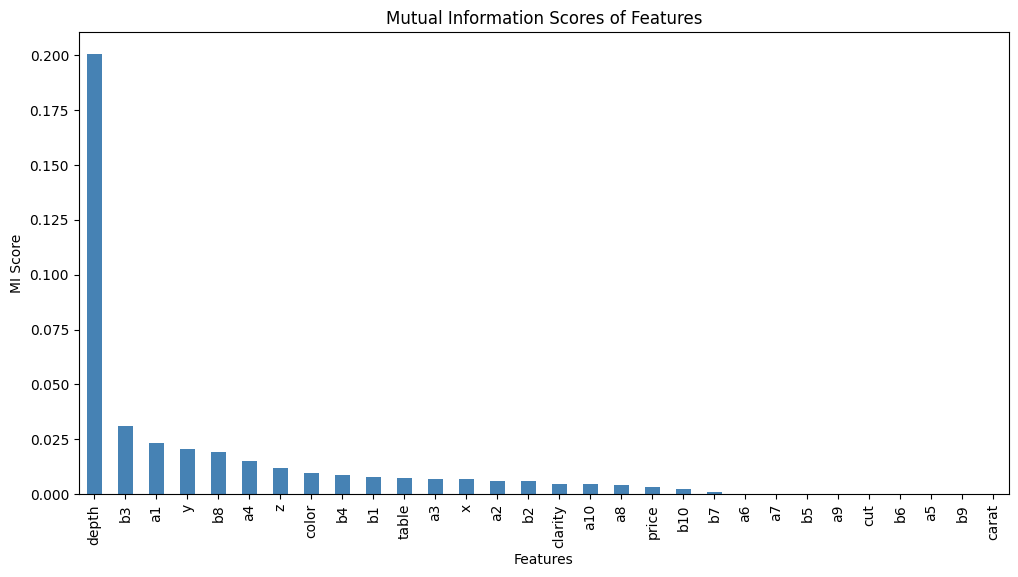

In [11]:
from sklearn.feature_selection import mutual_info_regression

# Select numerical features (exclude target)
X = df.drop(columns=["outcome"])
y = df["outcome"]

# Compute mutual information scores
mi_scores = mutual_info_regression(X, y)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Display top features based on MI
print("\nMutual Information Scores:\n", mi_scores)

# Plot MI scores
plt.figure(figsize=(12,6))
mi_scores.plot(kind='bar', color='steelblue')
plt.title("Mutual Information Scores of Features")
plt.ylabel("MI Score")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.show()

Features with Zero Mutual Information (Potential Candidates for Removal):
- `a6`, `a7`, `b5`, `a9`, `cut`, `b6`, `a5`, `b9`, `carat`: These contribute no additional information to predicting outcome.

Comparison from Pearson Correlation:
- `depth` is the strongest feature in both MI & correlation, reinforcing its importance.
- `color` and `clarity` show higher MI than correlation, suggesting potential nonlinear effects.
- Some features (`a6`, `a7`, `carat`) were already weak in correlation and now have zero MI, making them strong candidates for removal.

# Wrapper Methods

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Define models for RFE and RFA
linear_model = Lasso(alpha=0.01)  # LASSO for linear RFE
nonlinear_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Random Forest for nonlinear RFE

### RFE


RFE (Linear - Lasso) Feature Rankings:
 carat       1
a7          1
b1          1
a4          1
a1          1
b3          1
y           1
b4          1
table       1
depth       1
b9          2
b8          3
color       4
b7          5
b6          6
x           7
cut         8
a9          9
a10        10
b10        11
a8         12
b2         13
a6         14
price      15
z          16
a3         17
b5         18
clarity    19
a2         20
a5         21
dtype: int64

RFE (Nonlinear - Random Forest) Feature Rankings:
 a5          1
a8          1
a6          1
depth       1
b3          1
price       1
b1          1
a4          1
a3          1
a1          1
b6          2
b10         3
a2          4
b2          5
b5          6
b9          7
b4          8
a10         9
b7         10
a7         11
b8         12
a9         13
y          14
z          15
table      16
x          17
color      18
clarity    19
carat      20
cut        21
dtype: int64


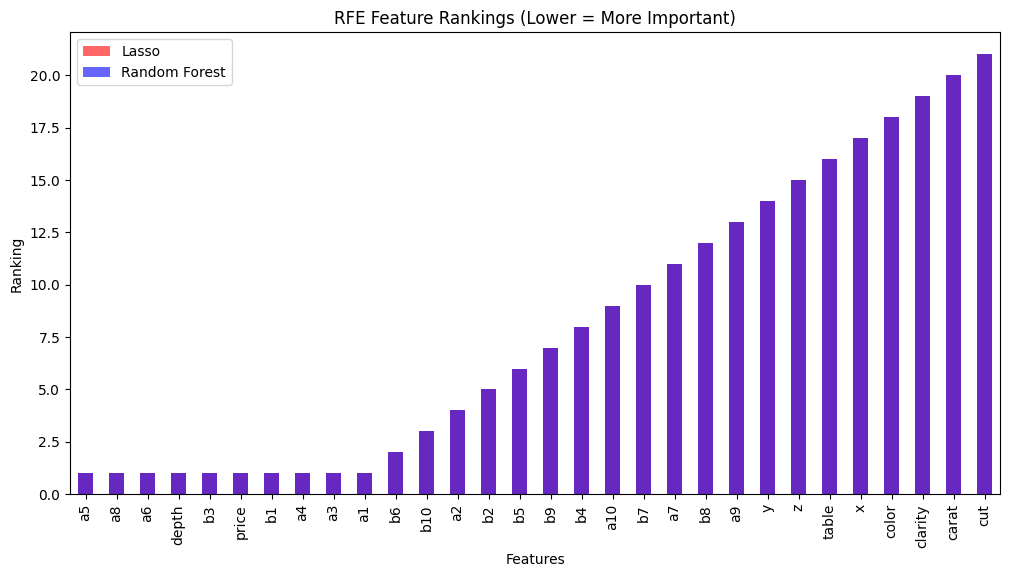

In [28]:
# Apply RFE (Linear)
rfe_linear = RFE(linear_model, n_features_to_select=10)
rfe_linear.fit(X, y)
linear_ranking = pd.Series(rfe_linear.ranking_, index=X.columns).sort_values()

# Apply RFE (Nonlinear)
rfe_nonlinear = RFE(nonlinear_model, n_features_to_select=10)
rfe_nonlinear.fit(X, y)
nonlinear_ranking = pd.Series(rfe_nonlinear.ranking_, index=X.columns).sort_values()

# Display results
print("\nRFE (Linear - Lasso) Feature Rankings:\n", linear_ranking)
print("\nRFE (Nonlinear - Random Forest) Feature Rankings:\n", nonlinear_ranking)

# Plot RFE rankings
plt.figure(figsize=(12,6))
linear_ranking.plot(kind='bar', color='red', alpha=0.6, label="Lasso")
nonlinear_ranking.plot(kind='bar', color='blue', alpha=0.6, label="Random Forest")
plt.title("RFE Feature Rankings (Lower = More Important)")
plt.ylabel("Ranking")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.legend()
plt.show()

### RFA

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

# Define cross-validation
cv = KFold(n_splits=5)

# RFA with Linear Model (LASSO)
rfa_linear = RFECV(linear_model, step=1, cv=cv, scoring='r2')
rfa_linear.fit(X, y)
linear_selected = X.columns[rfa_linear.support_]

# RFA with Nonlinear Model (Random Forest)
rfa_nonlinear = RFECV(nonlinear_model, step=1, cv=cv, scoring='r2')
rfa_nonlinear.fit(X, y)
nonlinear_selected = X.columns[rfa_nonlinear.support_]

# Display selected features
print("\nRFA (Linear - Lasso) Selected Features:\n", linear_selected)
print("\nRFA (Nonlinear - Random Forest) Selected Features:\n", nonlinear_selected)


RFA (Linear - Lasso) Selected Features:
 Index(['carat', 'depth', 'a1', 'a4', 'b1', 'b3'], dtype='object')

RFA (Nonlinear - Random Forest) Selected Features:
 Index(['depth', 'price', 'a1', 'a3', 'a4', 'a5', 'b1', 'b3', 'a6', 'a8', 'b6'], dtype='object')


AttributeError: 'RFECV' object has no attribute 'grid_scores_'

<Figure size 1000x600 with 0 Axes>

# Embedded Methods


Lasso Feature Importance:
 depth      5.219852
b3         2.806118
b1         2.049041
a1         1.843634
a4         1.459428
table      0.225744
carat      0.157010
a7         0.068691
color      0.037717
b4         0.001292
b5         0.000000
b9         0.000000
b8         0.000000
b7         0.000000
b6         0.000000
a10        0.000000
a9         0.000000
a8         0.000000
a6         0.000000
x          0.000000
y          0.000000
b2         0.000000
cut        0.000000
a5         0.000000
clarity    0.000000
a3         0.000000
a2         0.000000
price      0.000000
z          0.000000
b10        0.000000
dtype: float64


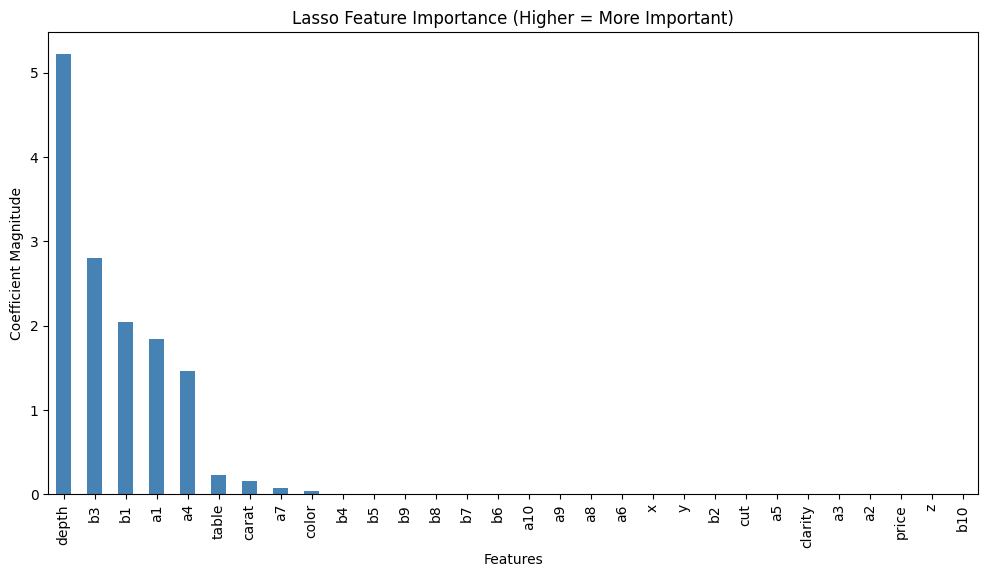

In [23]:
from sklearn.linear_model import LassoCV
import numpy as np
import pandas as pd

# Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply Lasso regression with cross-validation
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# Get feature importance (Lasso shrinks coefficients of less important features to zero)
lasso_importance = pd.Series(np.abs(lasso.coef_), index=X.columns).sort_values(ascending=False)

# Display top features
print("\nLasso Feature Importance:\n", lasso_importance)

# Plot feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
lasso_importance.plot(kind='bar', color='steelblue')
plt.title("Lasso Feature Importance (Higher = More Important)")
plt.ylabel("Coefficient Magnitude")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.show()


Random Forest Feature Importance:
 depth      0.348591
b3         0.077386
b1         0.060196
a1         0.055840
a4         0.038665
a3         0.033603
a5         0.022471
b5         0.021850
b2         0.021606
a6         0.021553
a2         0.021438
b6         0.021312
b10        0.020664
b9         0.020570
a10        0.020449
a8         0.020446
b4         0.020356
a7         0.019746
b7         0.019650
a9         0.019507
b8         0.019166
price      0.014980
table      0.010193
color      0.008431
clarity    0.008326
z          0.007925
y          0.007924
x          0.007658
carat      0.004950
cut        0.004546
dtype: float64


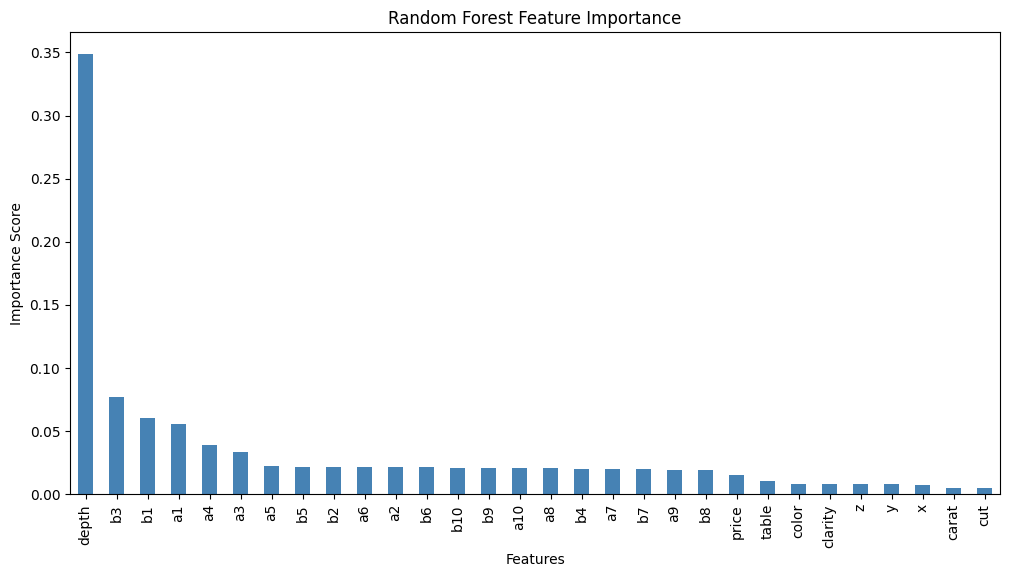

In [25]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Train a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance scores
rf_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display top features
print("\nRandom Forest Feature Importance:\n", rf_importance)

# Plot feature importance
plt.figure(figsize=(12,6))
rf_importance.plot(kind='bar', color='steelblue')
plt.title("Random Forest Feature Importance")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=90)
plt.show()